In [9]:
#9.4 Zip's Law Exercise
#!pip install -U nltk

#download book: Alice in Wonderland
import nltk
nltk.download('gutenberg')
from nltk.corpus import gutenberg
from nltk.text import Text
from nltk.tokenize import WhitespaceTokenizer
from pprint import pprint
import matplotlib.pyplot as plt
import math
#Tokenization
whitespace_wt = WhitespaceTokenizer()

alice = whitespace_wt.tokenize(nltk.corpus.gutenberg.raw('carroll-alice.txt'))

#find more freq words
count = nltk.FreqDist(alice)
#create rank
sorted_words = sorted([(word,count[word]) for word in count],key=lambda x: x[::-1], reverse=True)
ranks = {}
for w,r in zip(sorted_words,range(1,len(count))):
  ranks[w[0]] = r
#25 most frequence words
most_freq = count.most_common(26)
#pprint(most_freq)

#25 most frequence words which start with 'c'
most_freq_c = sorted([(word,count[word]) for word in count if word.startswith('c') or word.startswith('C')],key=lambda x: x[::-1], reverse=True)[0:24]
#pprint(most_freq_c)

[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!


In [10]:
#print
allWords = most_freq + most_freq_c
k = count.most_common(1)[0][1]
thres = 100
sum = 0
for w in allWords:
    print(" Word: " + w[0] + " Frequency: " + str(w[1]) + " Rank: " + str(ranks[w[0]]) + " Probability: "+ str(w[1]/len(alice)) + " Rank*Prob = "+ str(ranks[w[0]]*(w[1]/len(alice))))
len_alice = len(alice)
print("Sum of  words: "+ str(len_alice))
print("Unique words: "+ str(len(count)))

 Word: the Frequency: 1507 Rank: 1 Probability: 0.05699050788488447 Rank*Prob = 0.05699050788488447
 Word: and Frequency: 714 Rank: 2 Probability: 0.02700147487047612 Rank*Prob = 0.05400294974095224
 Word: to Frequency: 703 Rank: 3 Probability: 0.026585485761827326 Rank*Prob = 0.07975645728548197
 Word: a Frequency: 606 Rank: 4 Probability: 0.02291721816737889 Rank*Prob = 0.09166887266951557
 Word: of Frequency: 490 Rank: 5 Probability: 0.018530423930718905 Rank*Prob = 0.09265211965359453
 Word: she Frequency: 484 Rank: 6 Probability: 0.018303520780546836 Rank*Prob = 0.10982112468328101
 Word: said Frequency: 416 Rank: 7 Probability: 0.015731951745263397 Rank*Prob = 0.11012366221684378
 Word: it Frequency: 346 Rank: 8 Probability: 0.013084748326589268 Rank*Prob = 0.10467798661271414
 Word: in Frequency: 345 Rank: 9 Probability: 0.013046931134893924 Rank*Prob = 0.11742238021404532
 Word: was Frequency: 328 Rank: 10 Probability: 0.012404038876073062 Rank*Prob = 0.12404038876073062
 Word:

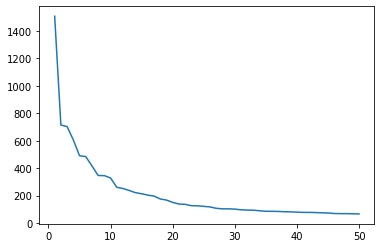

In [11]:
#f-r
freqs = []
for w in count.most_common(50):
  freqs.append(w[1])
plt.plot(range(1,51),freqs)
plt.show()

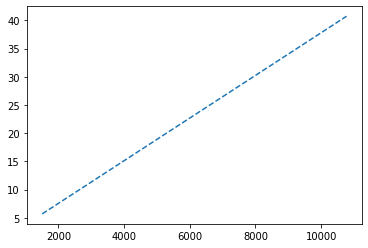

In [12]:
# athristiki pithabothta emfanishs
x = [] 
y = []
x.append(freqs[0])
y.append((x[0]/len_alice)*100)
for i in range(1,50):
  x.append(x[i-1]+freqs[i])
  y.append((x[i]/len_alice)*100)

plt.plot(x, y,'--')
plt.show()

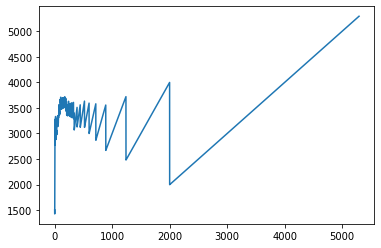

In [13]:
#Compute k
y2 = []
for w,r in zip(sorted_words,range(1,len(count))):
  y2.append(int(w[1])*r)
plt.plot(range(1,len(count)), y2)
plt.show()


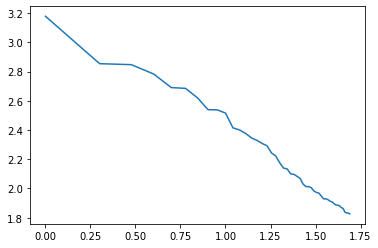

In [14]:
#Epalitheusi nomou Zipf
#logf-logr
log_freqs = []
rs = []
for i in range(1,len(freqs)):
  log_freqs.append(math.log(freqs[i-1],10))
  rs.append(math.log(i,10))
plt.plot(rs, log_freqs)
plt.show() 